In [153]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# 1. Create A, initialize array for <A>, and values for theta
A = [[2, 2],[2, -1]]
exp_A = []
thetas  = np.linspace(0, 2*np.pi, 500)

In [158]:
for count, theta in enumerate(thetas):

    # 2. Build circuit to measure Z
    circuit_z = QuantumCircuit(1,1)
    circuit_z.ry(2*theta,0)
    circuit_z.measure(0,0)

    # 3. Find expectation value of Z
    backend = Aer.get_backend('qasm_simulator') 
    result_z = execute(circuit_z, backend = backend, shots = 1024).result()
    data_z = result_z.data()
    if '0x0' not in data_z['counts']:
        Prob_0 = 0
    else:
        Prob_0 = data_z['counts']['0x0']/1024
    if '0x1' not in data_z['counts']:
        Prob_1 = 0
    else:
        Prob_1 = data_z['counts']['0x1']/1024
    exp_Z = Prob_0 - Prob_1

    # 4. Build circuit to measure X
    circuit_x = QuantumCircuit(1,1)
    circuit_x.ry(2*theta,0)
    circuit_x.h(0)
    circuit_x.measure(0,0)

    # 5. Find expectation value of X
    backend = Aer.get_backend('qasm_simulator') 
    result_x = execute(circuit_x, backend = backend, shots = 1024).result()
    data_x = result_x.data()
    if '0x0' not in data_x['counts']:
        Prob_0 = 0
    else:
        Prob_0 = data_x['counts']['0x0']/1024
        
    if '0x1' not in data_x['counts']:
        Prob_1 = 0
    else:
        Prob_1 = data_x['counts']['0x1']/1024
    exp_X = Prob_0 - Prob_1

    # 6. Calculate expectation value of A using I, X, and Z
    result = (A[0][0]+A[1][1])/2+A[0][1]*exp_X+(A[0][0]-A[1][1])/2*exp_Z
    exp_A.append(result)

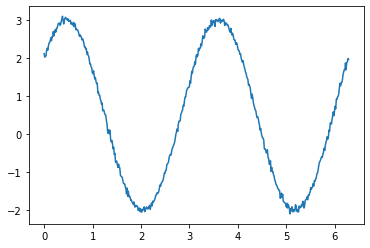

In [159]:
plt.plot(thetas,exp_A)